In [9]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [10]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\HP\\Documents\\Acad stuff\\GaTech\\research\\prof_siva_spl_problems\\simulations\\repo\\utils.py'>

In [11]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

Gather all file names here

### Original (N = 4, 9, non-zero diagonals)
stuff for which this plot was done originally

In [3]:
file_names = []

# Increased diagonal weights
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
for w in weights:
    file_names.append( "../sim_paths_spatial_uniform_9_W_" + str(w) + '.pkl' )
for w in weights:
    file_names.append( "../sim_paths_spatial_uniform_4_W_" + str(w) + '.pkl' )

In [9]:
np.array([])
lol = []
lol += [1,2,3]
print(lol)

[1, 2, 3]


In [4]:
k = len(file_names)
gaps = np.array([])
x_vals = np.array([])
Ws = []
for file_name in file_names:
    
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]

    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps = np.append( gaps, [cB - cM] )
    x_vals = np.append(x_vals, [np.var(W)/np.mean(W)])
    Ws.append(W)

In [5]:
pos = np.argmax(gaps)
print(x_vals[pos], gaps[pos], Ws[pos])

0.357304602413619 0.3506052100896687 [[0.1        1.         2.         1.         1.41421356 2.23606798
  2.         2.23606798 2.82842712]
 [1.         0.1        1.         1.41421356 1.         1.41421356
  2.23606798 2.         2.23606798]
 [2.         1.         0.1        2.23606798 1.41421356 1.
  2.82842712 2.23606798 2.        ]
 [1.         1.41421356 2.23606798 0.1        1.         2.
  1.         1.41421356 2.23606798]
 [1.41421356 1.         1.41421356 1.         0.1        1.
  1.41421356 1.         1.41421356]
 [2.23606798 1.41421356 1.         2.         1.         0.1
  2.23606798 1.41421356 1.        ]
 [2.         2.23606798 2.82842712 1.         1.41421356 2.23606798
  0.1        1.         2.        ]
 [2.23606798 2.         2.23606798 1.41421356 1.         1.41421356
  1.         0.1        1.        ]
 [2.82842712 2.23606798 2.         2.23606798 1.41421356 1.
  2.         1.         0.1       ]]


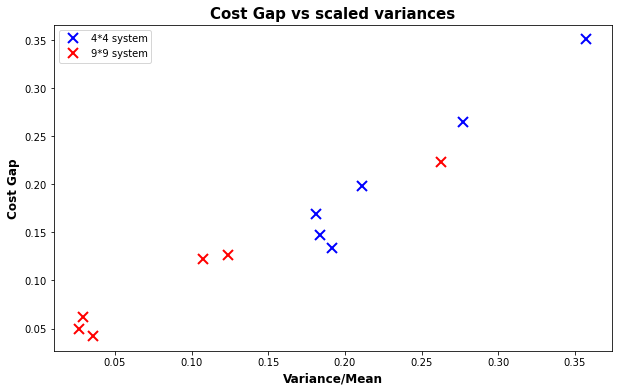

In [17]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals[0:6],gaps[0:6],'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(x_vals[6:],gaps[6:],'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

#### Add N = 16, W_diag = 1.25

In [18]:
# Add N = 16 
# weights = [0.1,0.5,1.0,1.25 ,1.414,2.0]
weights = [ 1.25 ]
for w in weights:
    file_names.append( "../sim_paths_spatial_uniform_16_W_" + str(w) + '.pkl' )
with open("sim_paths_spatial_uniform_16_W_1.25_new.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]

# zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
# [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
gaps = np.append( gaps, [cB - cM] )
x_vals = np.append(x_vals, [np.var(W)/np.mean(W)])

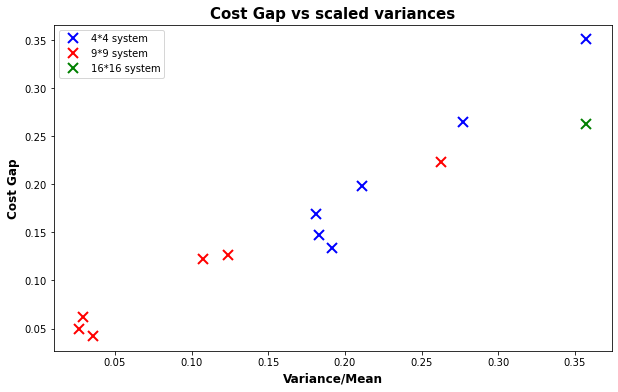

In [21]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals[0:6],gaps[0:6],'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(x_vals[6:12],gaps[6:12],'rx', markersize = 10, markeredgewidth=2)
plt.plot(x_vals[12],gaps[12],'gx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system", "16*16 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

W = 1.25 is off anyway so let's maybe ignore this

In [27]:
# Can't delete elements so this cheating
new_gaps = gaps[0:15]
new_xvals = x_vals[0:15]
gaps = new_gaps
x_vals = new_xvals

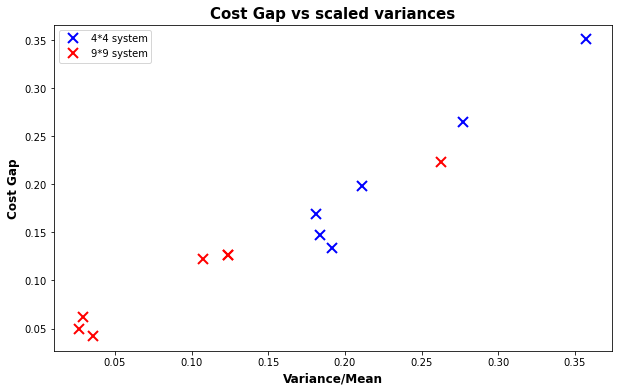

In [28]:
plt.figure( figsize=(10,6) )
plt.plot(new_xvals[0:6],new_gaps[0:6],'bx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_9,linewidth=4)
plt.plot(new_xvals[6:],new_gaps[6:],'rx', markersize = 10, markeredgewidth=2)
#plt.plot(weights,gaps_4,linewidth=4)
plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

### No diag and longest spatial - 4, 9

In [31]:
# new results
more_files = ["../sp_u_no-diag_9.pkl", "../sp_u_no-diag_4.pkl", "longest_spatial_uniform_9.pkl", "longest_spatial_uniform_4.pkl" ]

In [32]:
for file_name in more_files:
    
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]

    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps = np.append( gaps, [cB - cM] )
    x_vals = np.append(x_vals, [np.var(W)/np.mean(W)])

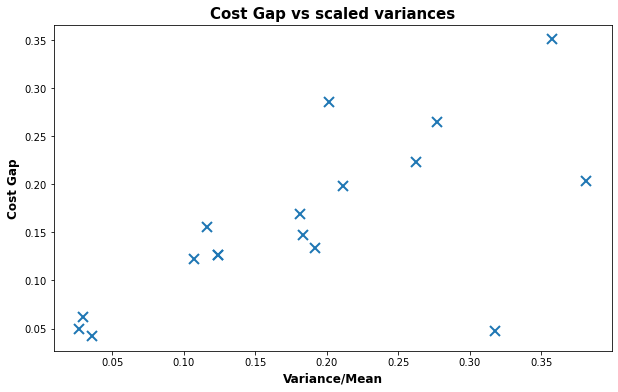

In [33]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals,gaps,'x', markersize = 10, markeredgewidth=2)
# plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [67]:
def get_gaps(file_names, gaps, x_vals):
    for file_name in file_names:
        with open(file_name,'rb') as f:
            M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        Q_paths_M = M_res["Q_paths"]
        C_paths_M = M_res["C_paths"]
        Q_paths_B = B_res["Q_paths"]
        C_paths_B = B_res["C_paths"]

        # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
        (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
        (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
        # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
        cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
        gaps = np.append( gaps, [cB - cM] )
        x_vals = np.append(x_vals, [np.var(W)/np.mean(W)])
        return ( [gaps, x_vals] )

In [44]:
gaps, x_vals = get_gaps(["../sim_paths_spatial_uniform_4.pkl", "../sim_paths_spatial_uniform_9.pkl"], gaps, x_vals)

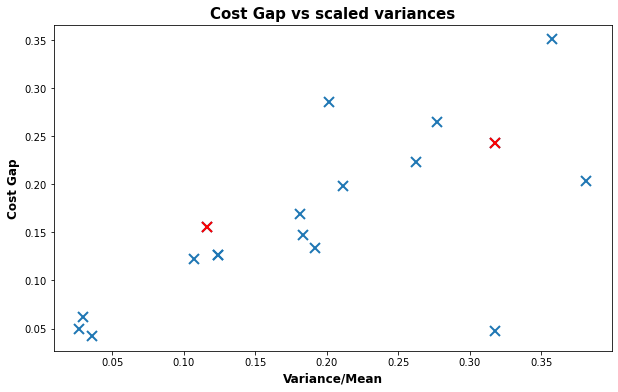

In [45]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals,gaps,'x', markersize = 10, markeredgewidth=2)
plt.plot(x_vals[-2:],gaps[-2:],'rx', markersize = 10, markeredgewidth=2)
# plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

Okay not bad

### Spring 2024 main results

In [39]:
# Spring 2024 results
# sp2024_list= ["sim_paths_random_2.pkl","sim_paths_random_5.pkl", "../sim_paths_spatial_uniform_4.pkl", "../sim_paths_spatial_uniform_9.pkl", "../sim_paths_spatial_uniform_16.pkl"]
# sp2024_list += ["../sim_paths_spatial_random_2.pkl", "../sim_paths_spatial_random_5.pkl"]
# sp2024_list += ["../sim_paths_random_4_random_pmf.pkl".]
# check which files make sense

sp2024_list = ["../sim_paths_spatial_uniform_4.pkl", "../sim_paths_spatial_uniform_9.pkl"]
# sp2024_list += ["../sim_paths_random.pkl", ] bad file
sp2024_list += ["../sim_paths_random_4.pkl", "../sim_paths_random_2.pkl", "../sim_paths_random_5.pkl", "../sim_paths_random_4_random_pmf.pkl"]
sp2024_list += ["../sim_paths_spatial_scale_10_rerun.pkl", "../sim_paths_spatial_scale_16.pkl"]
gaps = np.array([])
x_vals = np.array([])
[gaps,x_vals] = get_gaps(sp2024_list,gaps,x_vals)

Expected cost for c = 0 case: 21.161
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0xdab849ce
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-03, 2e-01]
Presolve time: 0.01s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.534807e-01   0.000000e+00      0s
      24    4.6021677e+00   0.000000e+00   0.000000e+00      0s

Solved in 24 iterations and 0.09 seconds (0.00 work units)
Optimal objective  4.602167705e+00
Objective Value: 4.60
x:  [[0.05918046 0.         0.         0.         0.02631973 0.00515958
  0.         0.         0.         0.       

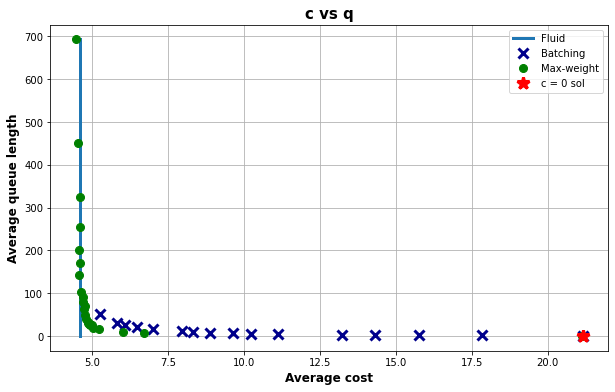

In [117]:
plot_from_sim_paths("../sim_paths_spatial_scale_10_rerun.pkl")

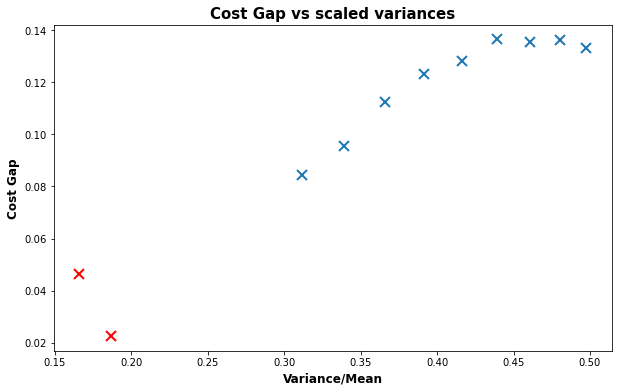

In [94]:
[gaps,x_vals] = get_gaps_nonU(["../sim_paths_random_4.pkl","../sim_paths_random_4_random_pmf.pkl" ],gaps,x_vals)
plt.figure( figsize=(10,6) )
plt.plot(x_vals[:9],gaps[:9],'x', markersize = 10, markeredgewidth=2)
plt.plot(x_vals[-2:],gaps[-2:],'rx', markersize = 10, markeredgewidth=2)
# plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

tried including random pmf too, but curves arent great

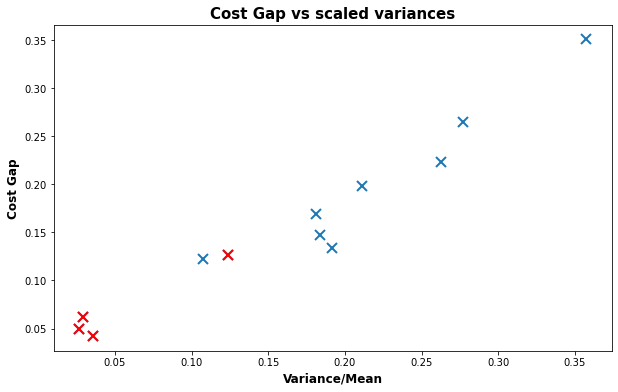

In [15]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals,gaps,'x', markersize = 10, markeredgewidth=2)
plt.plot(x_vals[-4:],gaps[-4:],'rx', markersize = 10, markeredgewidth=2)
# plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [41]:
gaps[15:]

array([0.28507769, 0.15608608])

In [89]:
def get_gaps_nonU(file_names, gaps, x_vals):
    for file_name in file_names:
        with open(file_name,'rb') as f:
            M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        cost_pmf = np.outer(pmf_cust,pmf_serv).ravel()
        weights = W.ravel()

        mean_cost = sum(cost_pmf*weights)
        variance_cost = sum(cost_pmf*(weights**2)) - mean_cost**2
        
        Q_paths_M = M_res["Q_paths"]
        C_paths_M = M_res["C_paths"]
        Q_paths_B = B_res["Q_paths"]
        C_paths_B = B_res["C_paths"]

        # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
        (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
        (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
        # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
        cM, qM, cB, qB = utils.minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
        gaps = np.append( gaps, [cB - cM] )
        x_vals = np.append(x_vals, [variance_cost/mean_cost])
    return ( [gaps, x_vals] )

In [90]:
# June results
# Probab curve simulations so all have weird PMFs

# weights = [0.1,0.5,1.0,1.25,1.414,2.0]
June_list = []
for i in range(9):
    June_list.append( "../probab_curve_50k/sim_paths_prob_curve" + str(i) + '.pkl' )
for i in range(2,4):
    June_list.append( "../probab_curve_50k/sp_prob_curve_right_" + str(i) + '.pkl' )
gaps = np.array([])
x_vals = np.array([])
[gaps, x_vals] = get_gaps_nonU(June_list, gaps, x_vals)

In [86]:
gaps.shape

(10,)

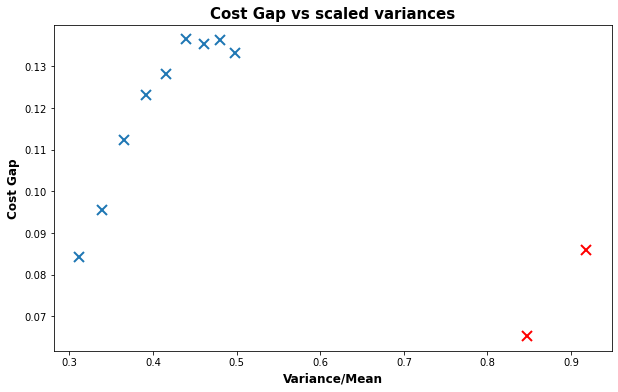

In [91]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals[:9],gaps[:9],'x', markersize = 10, markeredgewidth=2)
plt.plot(x_vals[-2:],gaps[-2:],'rx', markersize = 10, markeredgewidth=2)
# plt.legend(["4*4 system", "9*9 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

Expected cost for c = 0 case: 0.559
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xa1d27914
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 9e-01]
Presolve removed 2 rows and 5 columns
Presolve time: 0.02s
Presolved: 6 rows, 11 columns, 22 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.6112698e-01   2.000000e-01   0.000000e+00      0s
       4    4.3183766e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.03 seconds (0.00 work units)
Optimal objective  4.318376618e-01
Objective Value: 0.43
x:  [[0.6   0.    0.    0.   ]
 [0.025 0.025 0.    0.   ]
 [0.025 0.    0.025 0.   ]
 

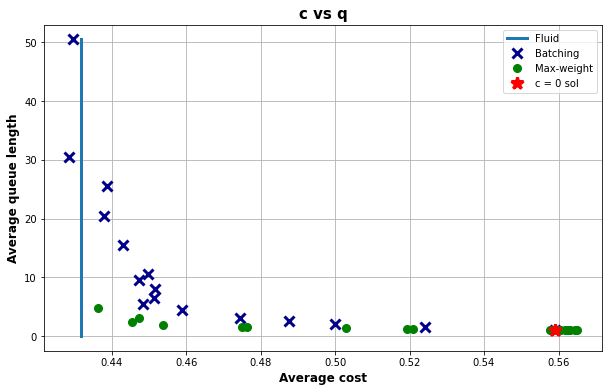

In [70]:
plot_from_sim_paths( "../probab_curve_50k/sp_prob_curve_right_1.pkl" ) 

Expected cost for c = 0 case: 0.77
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xc184ac46
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 5e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.14s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.689900e-01   0.000000e+00      0s
       4    3.0656854e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.18 seconds (0.00 work units)
Optimal objective  3.065685425e-01
Objective Value: 0

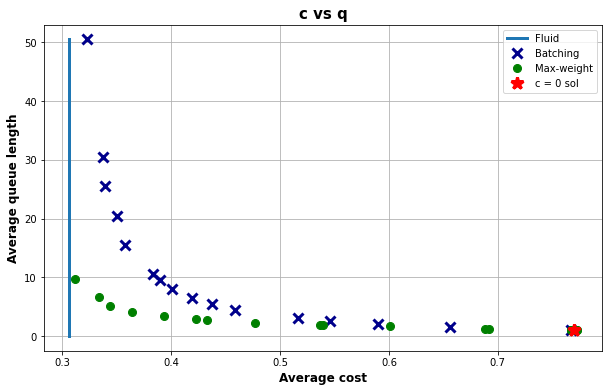

In [18]:
plot_from_sim_paths("../probab_curve_50k/sim_paths_prob_curve5.pkl")

In [22]:
with open("../probab_curve_50k/sim_paths_prob_curve5.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)


In [45]:
pmf_new = np.outer(pmf_cust,pmf_serv)
print(pmf_new)
print(W)

[[0.003 0.06  0.075 0.162]
 [0.001 0.02  0.025 0.054]
 [0.001 0.02  0.025 0.054]
 [0.005 0.1   0.125 0.27 ]]
[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]


In [64]:
lol = np.outer(pmf_cust,pmf_serv).ravel()
print(lol == cost_pmf)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [55]:
weights = W.ravel()
print(weights)
print(weights**2)

[0.         1.         1.         1.41421356 1.         0.
 1.41421356 1.         1.         1.41421356 0.         1.
 1.41421356 1.         1.         0.        ]
[0. 1. 1. 2. 1. 0. 2. 1. 1. 2. 0. 1. 2. 1. 1. 0.]


In [52]:
cost_pmf = pmf_new.ravel()
print(cost_pmf)

[0.003 0.06  0.075 0.162 0.001 0.02  0.025 0.054 0.001 0.02  0.025 0.054
 0.005 0.1   0.125 0.27 ]


In [60]:
sum( cost_pmf*(weights**2) )

0.8940000000000002

In [65]:
mean_cost = sum( cost_pmf*weights )
print(mean_cost)
variance_cost = sum(cost_pmf*(weights**2))
print(variance_cost) 

0.7698132752230962
0.8940000000000002


In [41]:
pmf_serv

array([[0.01],
       [0.2 ],
       [0.25],
       [0.54]])

In [39]:
pmf_cust

array([[0.3],
       [0.1],
       [0.1],
       [0.5]])

Expected cost for c = 0 case: 0.685
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xb6e1a2ec
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 9e-01]
Presolve removed 2 rows and 5 columns
Presolve time: 0.01s
Presolved: 6 rows, 11 columns, 22 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0254834e-01   2.000000e-01   0.000000e+00      0s
       4    5.7325902e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.03 seconds (0.00 work units)
Optimal objective  5.732590181e-01
Objective Value: 0.57
x:  [[0.5   0.    0.    0.   ]
 [0.025 0.025 0.    0.   ]
 [0.025 0.    0.025 0.   ]
 

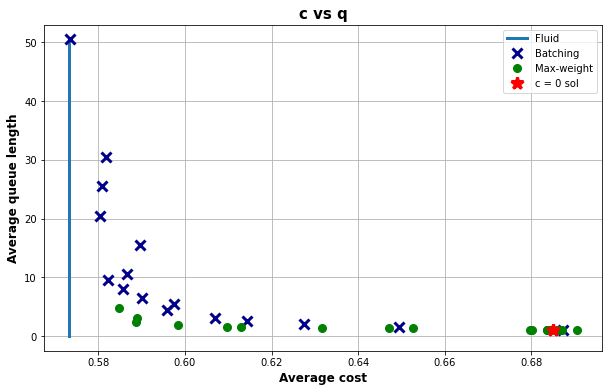

In [77]:
plot_from_sim_paths( "../probab_curve_50k/sp_prob_curve_right_0.pkl" ) 

### Uniform 16 with nonzero diagonals

In [98]:
file_names_new= []
weights = [0.1,0.5,1.0,1.25,1.414,2.0]
for w in weights:
    file_names_new.append("../sim_paths_spatial_uniform_16_W_"+ str(w) + '_new.pkl' )

Expected cost for c = 0 case: 2.014
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0xf8b3fe03
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e-02, 6e-02]
Presolve time: 0.02s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.000000000e-01
Objective Value: 0.10
x:  [[0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.     0.     0.     0.     0.     0.     0.     

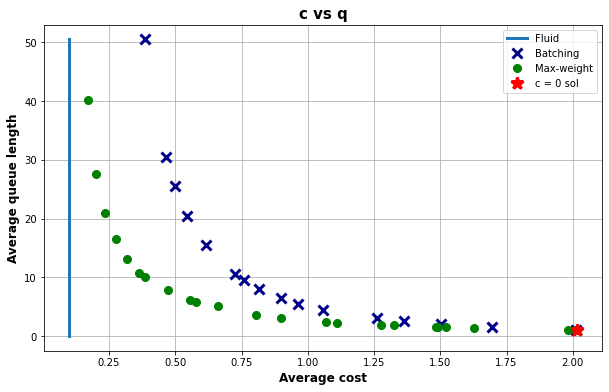

In [101]:
plot_from_sim_paths(file_names_new[0])

In [110]:
gaps = np.array([])
x_vals = np.array([])
[gaps, x_vals] = get_gaps_nonU(file_names_new, gaps, x_vals)

In [109]:
file_names_new

['../sim_paths_spatial_uniform_16_W_0.1_new.pkl',
 '../sim_paths_spatial_uniform_16_W_0.5_new.pkl',
 '../sim_paths_spatial_uniform_16_W_1.0_new.pkl',
 '../sim_paths_spatial_uniform_16_W_1.25_new.pkl',
 '../sim_paths_spatial_uniform_16_W_1.414_new.pkl',
 '../sim_paths_spatial_uniform_16_W_2.0_new.pkl']

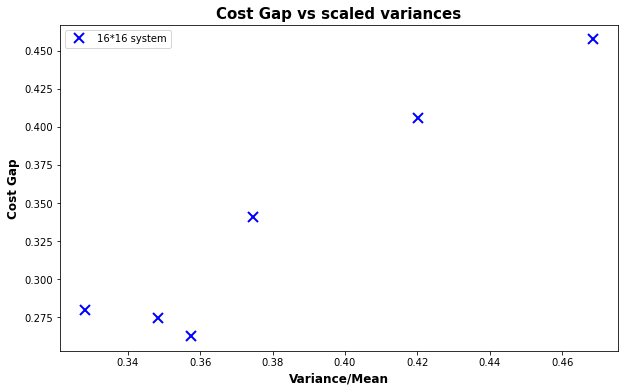

In [114]:
plt.figure( figsize=(10,6) )
plt.plot(x_vals,gaps,'bx', markersize = 10, markeredgewidth=2)
plt.legend(["16*16 system"])
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Variance/Mean", weight='bold',fontsize=12)
plt.title("Cost Gap vs scaled variances", weight='bold',fontsize=15)
# plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [112]:
x_vals

array([0.46834039, 0.42026093, 0.37452893, 0.35744307, 0.34827077,
       0.32828984])

In [113]:
gaps

array([0.45725575, 0.40570768, 0.34072006, 0.26280442, 0.27456589,
       0.2795958 ])